In [39]:
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv('C:/Users/Hello/Desktop/Placement_Prediction/placement.csv')

In [41]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  267 non-null    int64  
 1   cgpa        267 non-null    float64
 2   iq          267 non-null    float64
 3   placement   267 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 8.5 KB


In [43]:
df.shape

(267, 4)

In [44]:
df = df.iloc[:,1:]

In [45]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [46]:
# Steps

# 0. Preprocess + EDA + Feature Selection ->preprocess by removing 0th column in above step- (df = df.iloc[:,1:]) because it was not required
# 1. Extract input and output cols
# 2. Scale the values ->to bring highly varying values in range(x & y axis values have vary highly eg- age of a person can be between 0 to 120 max but salary can go upto lakhs so here)
# x & y values are varying very much and thus the distance will be more and the model may face problems in prediction
# 3. Train test split ->to test the the model with training data which was not used for training but we have the output so that we can compare the results (actual & predicted output)
# 4. Train the model
# 5. Evaluate the model/model selection -> evaluate diff algos & choose the algo/model which performs best(not doing this in this project)
# 6. Deploy the model -> deploying on the server after integrating with the software application.

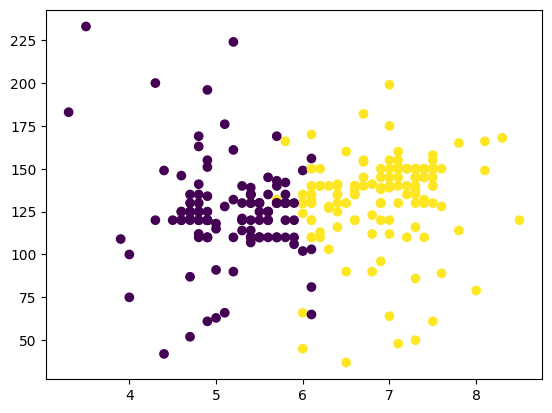

In [47]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #cgpa is x asis, iq is y axis and the placement is with colors, yellow means placed(1), violet means not placed (0)

In [48]:
# step -3 extracting input & output cols
x = df.iloc[:,0:2] #input cols, independent variables
y = df.iloc[:,-1] #output col, dependent variable

In [49]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
262,6.1,120.0
263,5.5,130.0
264,7.2,150.0
265,6.7,140.0


In [50]:
y

0      1
1      0
2      0
3      1
4      0
      ..
262    1
263    0
264    1
265    1
266    0
Name: placement, Length: 267, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [52]:
x_train

,cgpa,iq
247,6.6,135.0
70,6.3,127.0
55,7.8,114.0
132,5.5,130.0
24,4.7,121.0
...,...,...
155,7.5,155.0
59,4.8,112.0
151,7.1,145.0
248,5.5,130.0


In [53]:
y_train

247    1
70     1
55     1
132    0
24     0
      ..
155    1
59     0
151    1
248    0
148    0
Name: placement, Length: 240, dtype: int64

In [54]:
x_test #random values which will be used for testing

,cgpa,iq
9,5.1,66.0
208,7.3,150.0
46,5.3,114.0
110,6.4,125.0
210,5.4,135.0
83,7.5,130.0
75,4.8,169.0
65,8.1,166.0
119,7.8,165.0
246,7.4,150.0


In [55]:
y_test # actual output for these as per our given data i.e placement column corresponding to these random inputs

9      0
208    1
46     0
110    1
210    0
83     1
75     0
65     1
119    1
246    1
165    1
238    0
157    1
12     0
239    0
176    1
79     1
204    1
52     1
171    1
58     1
260    0
6      0
206    0
62     0
243    1
154    1
Name: placement, dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler #for scaling the values, not necessary fo this projects

scaler = StandardScaler() ##scaler is an object which will be used to access the StandardScaler function


In [57]:
x_train = scaler.fit_transform(x_train)

In [58]:
x_train

array([[ 0.53047623,  0.23613659],
       [ 0.23347554, -0.06019168],
       [ 1.718479  , -0.54172511],
       [-0.5585263 ,  0.05093142],
       [-1.35052814, -0.28243788],
       [ 0.13447531,  0.79175209],
       [ 1.12447761,  0.23613659],
       [ 0.03547508,  0.12501349],
       [-0.06352515, -3.09755641],
       [-1.25152791,  0.45838279],
       [ 0.82747692,  0.38430072],
       [-1.25152791,  0.23613659],
       [ 0.82747692,  0.05093142],
       [ 0.03547508, -0.94917648],
       [ 0.82747692, -1.20846371],
       [-0.06352515,  0.05093142],
       [-0.45952607, -0.13427375],
       [ 1.22347784,  0.79175209],
       [ 1.12447761,  0.79175209],
       [-1.44952837, -0.13427375],
       [ 0.431476  ,  1.16216242],
       [-1.25152791, -0.31947891],
       [ 0.53047623,  0.42134175],
       [ 1.22347784, -2.91235124],
       [ 1.22347784,  0.60654692],
       [ 1.32247808, -0.68988925],
       [ 0.72847669, -1.43070991],
       [ 1.32247808,  0.60654692],
       [-0.26152561,

In [59]:
x_test = scaler.transform(x_test) #similarly scaling testing data

x_test

array([[-0.95452722, -2.31969471],
       [ 1.22347784,  0.79175209],
       [-0.75652676, -0.54172511],
       [ 0.33247577, -0.13427375],
       [-0.65752653,  0.23613659],
       [ 1.42147831,  0.05093142],
       [-1.25152791,  1.49553172],
       [ 2.01547969,  1.38440862],
       [ 1.718479  ,  1.34736759],
       [ 1.32247808,  0.79175209],
       [ 0.03547508, -0.31947891],
       [-0.45952607,  0.23613659],
       [ 0.03547508,  0.23613659],
       [-0.65752653,  0.38430072],
       [-1.25152791, -0.13427375],
       [ 1.42147831,  0.79175209],
       [ 0.431476  , -1.43070991],
       [ 0.03547508,  0.05093142],
       [ 0.92647715,  1.71777792],
       [ 1.32247808,  0.05093142],
       [ 1.91647946, -1.83816128],
       [-1.15252768, -0.68988925],
       [-0.36052584,  0.53246485],
       [-0.45952607, -0.13427375],
       [-0.06352515, -0.98621751],
       [ 1.22347784,  0.42134175],
       [-0.06352515,  0.05093142]])

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf = LogisticRegression()

In [62]:
# model training
clf.fit(x_train,y_train) #using logistic regression ( classification)

LogisticRegression()

In [63]:
y_pred = clf.predict(x_test) # Pass x_test (test features) to predict

In [64]:
y_test

9      0
208    1
46     0
110    1
210    0
83     1
75     0
65     1
119    1
246    1
165    1
238    0
157    1
12     0
239    0
176    1
79     1
204    1
52     1
171    1
58     1
260    0
6      0
206    0
62     0
243    1
154    1
Name: placement, dtype: int64

In [65]:
y_pred #predicted values

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,y_pred) #to find the accuracy score

1.0

In [68]:
# it means 90% accuracy

In [69]:
# To find decision boundary in this model :-

In [70]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

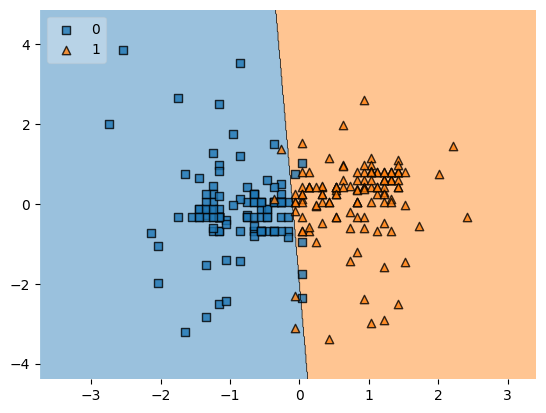

In [71]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [72]:
#doing new stuff

In [73]:
import os
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess your data
df = pd.read_csv('C:/Users/Hello/Desktop/Placement_Prediction/placement.csv')
df = df.iloc[:, 1:]
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train the model
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Ensure the Placement_prediction directory exists
os.makedirs('Placement_Prediction', exist_ok=True)

# Save the model to the Placement_prediction folder
pickle.dump(clf, open('Placement_Prediction/model.pkl', 'wb'))

# Verify the file creation
print(os.listdir('Placement_Prediction'))


['model.pkl']


In [74]:
import os
print(os.path.abspath('Placement_prediction/model.pkl'))


c:\Users\Hello\Desktop\Placement_Prediction\Placement_prediction\model.pkl


In [75]:
print(y.value_counts())

placement
1    143
0    124
Name: count, dtype: int64


In [76]:
# Initial imports and data loading // Retraining to balance the model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import os
import pickle

# Load and preprocess your data
df = pd.read_csv('C:/Users/Hello/Desktop/Placement_Prediction/placement.csv')
df = df.iloc[:, 1:]
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initial model training
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Initial predictions and evaluation
y_pred = clf.predict(x_test)
print("Initial Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Add SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Retrain the model with resampled data
clf.fit(x_train_resampled, y_train_resampled)
y_pred = clf.predict(x_test)

# Evaluate the model with resampled data
print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred))
print("Confusion Matrix after SMOTE:\n", confusion_matrix(y_test, y_pred))

# Save the improved model
os.makedirs('Placement_Prediction', exist_ok=True)
pickle.dump(clf, open('Placement_Prediction/model.pkl', 'wb'))
print("Model saved successfully.")

# Verify the file creation
print(os.listdir('Placement_Prediction'))

import os
print(os.path.abspath('Placement_prediction/model.pkl'))

Initial Accuracy: 0.9629629629629629
Confusion Matrix:
 [[10  0]
 [ 1 16]]
Accuracy after SMOTE: 0.9629629629629629
Confusion Matrix after SMOTE:
 [[10  0]
 [ 1 16]]
Model saved successfully.
['model.pkl']
c:\Users\Hello\Desktop\Placement_Prediction\Placement_prediction\model.pkl


In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# Load the model
model = pickle.load(open('Placement_Prediction/model.pkl', 'rb'))

# Load and preprocess your data
df = pd.read_csv('C:/Users/Hello/Desktop/Placement_Prediction/placement.csv')
df = df.iloc[:, 1:]

# Extract features
x = df.iloc[:, 0:2]

# Initialize and fit the scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# If the model has not been trained before this point, you should train it
# For demonstration, we'll fit it again with the same data
clf = LogisticRegression()
clf.fit(x_scaled, df.iloc[:, -1])

# Example manual input
cgpa_input = 5
iq_input = 120

# Convert to a numpy array and scale
input_values = np.array([[cgpa_input, iq_input]])
input_values_scaled = scaler.transform(input_values)

# Predict
prediction = model.predict(input_values_scaled)
print(prediction)
result = 'Placed' if prediction[0] == 1 else 'Not Placed'

print("Manual Input Prediction:", result)


Manual Input Prediction: Not Placed


c:\Users\Hello\Desktop\Placement_Prediction\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
